# Supervised Learning Project

------

## GOAL: Create a model to predict whether or not a customer will Churn .

----

## Part 0: Imports and Read in the Data

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [252]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Statistical Summary

In [254]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [255]:
#Confirming that there are no NaN cells by displaying NaN values per feature column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

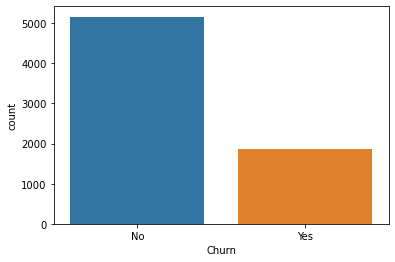

In [256]:
#Displaying the balance of the class labels (Churn) with a Count Plot.
sns.countplot(data=df, x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

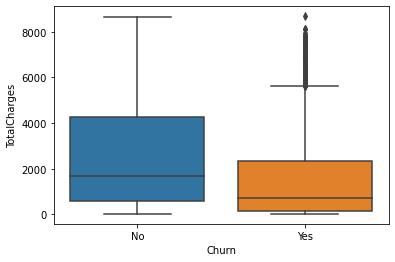

In [257]:
#Exploring the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot

sns.boxplot(data=df, x='Churn', y='TotalCharges')

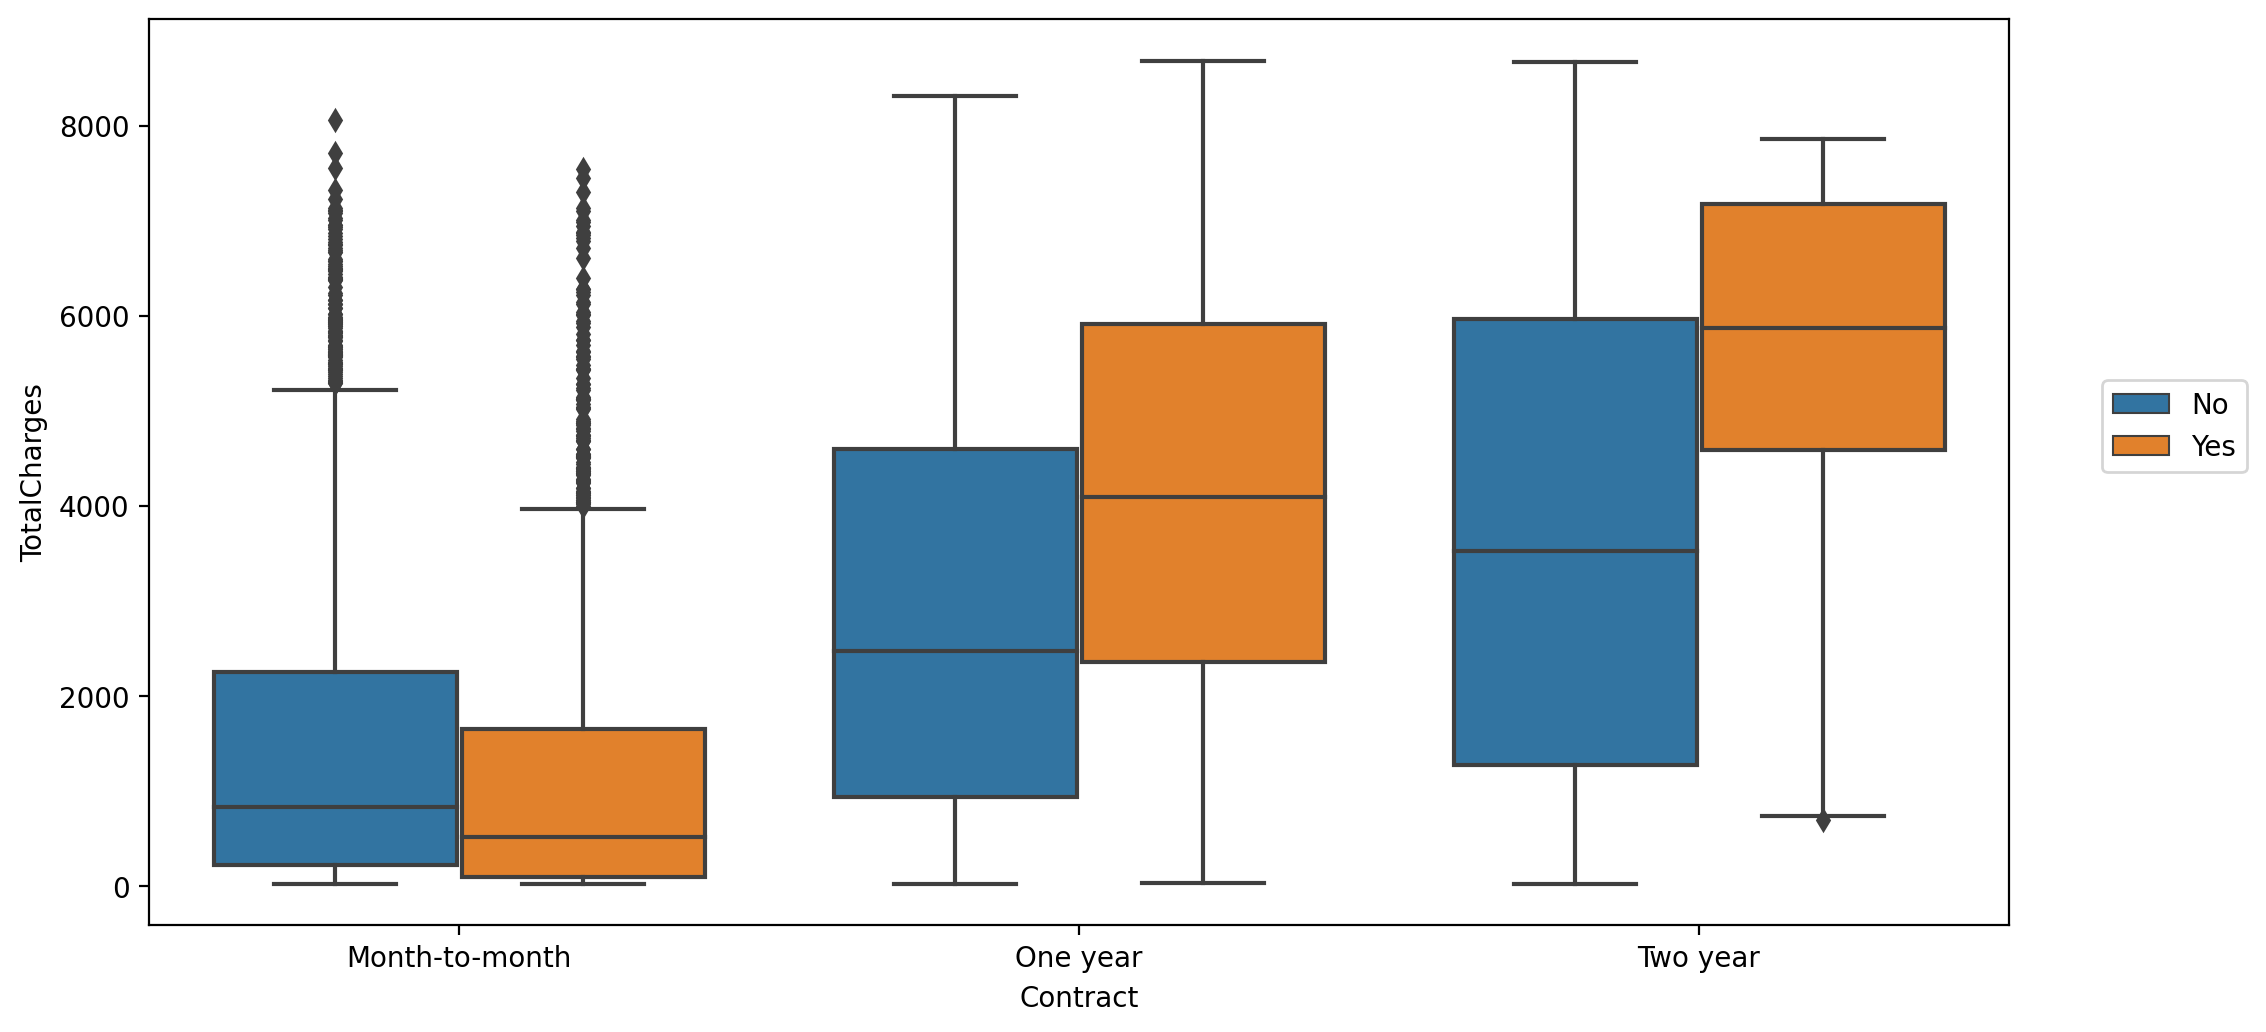

In [258]:
#Creating a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class

plt.figure(figsize=(12,6), dpi=200)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc=(1.05,0.5))

In [259]:
#Creating Dummy variables for categorical features

corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']])

In [260]:
#Calculating Correlation of the above features to the target "Class" label

corr_df.corr()['Churn_Yes'].sort_values()[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

Text(0.5, 1.0, 'Feature Correlation to Yes Churn')

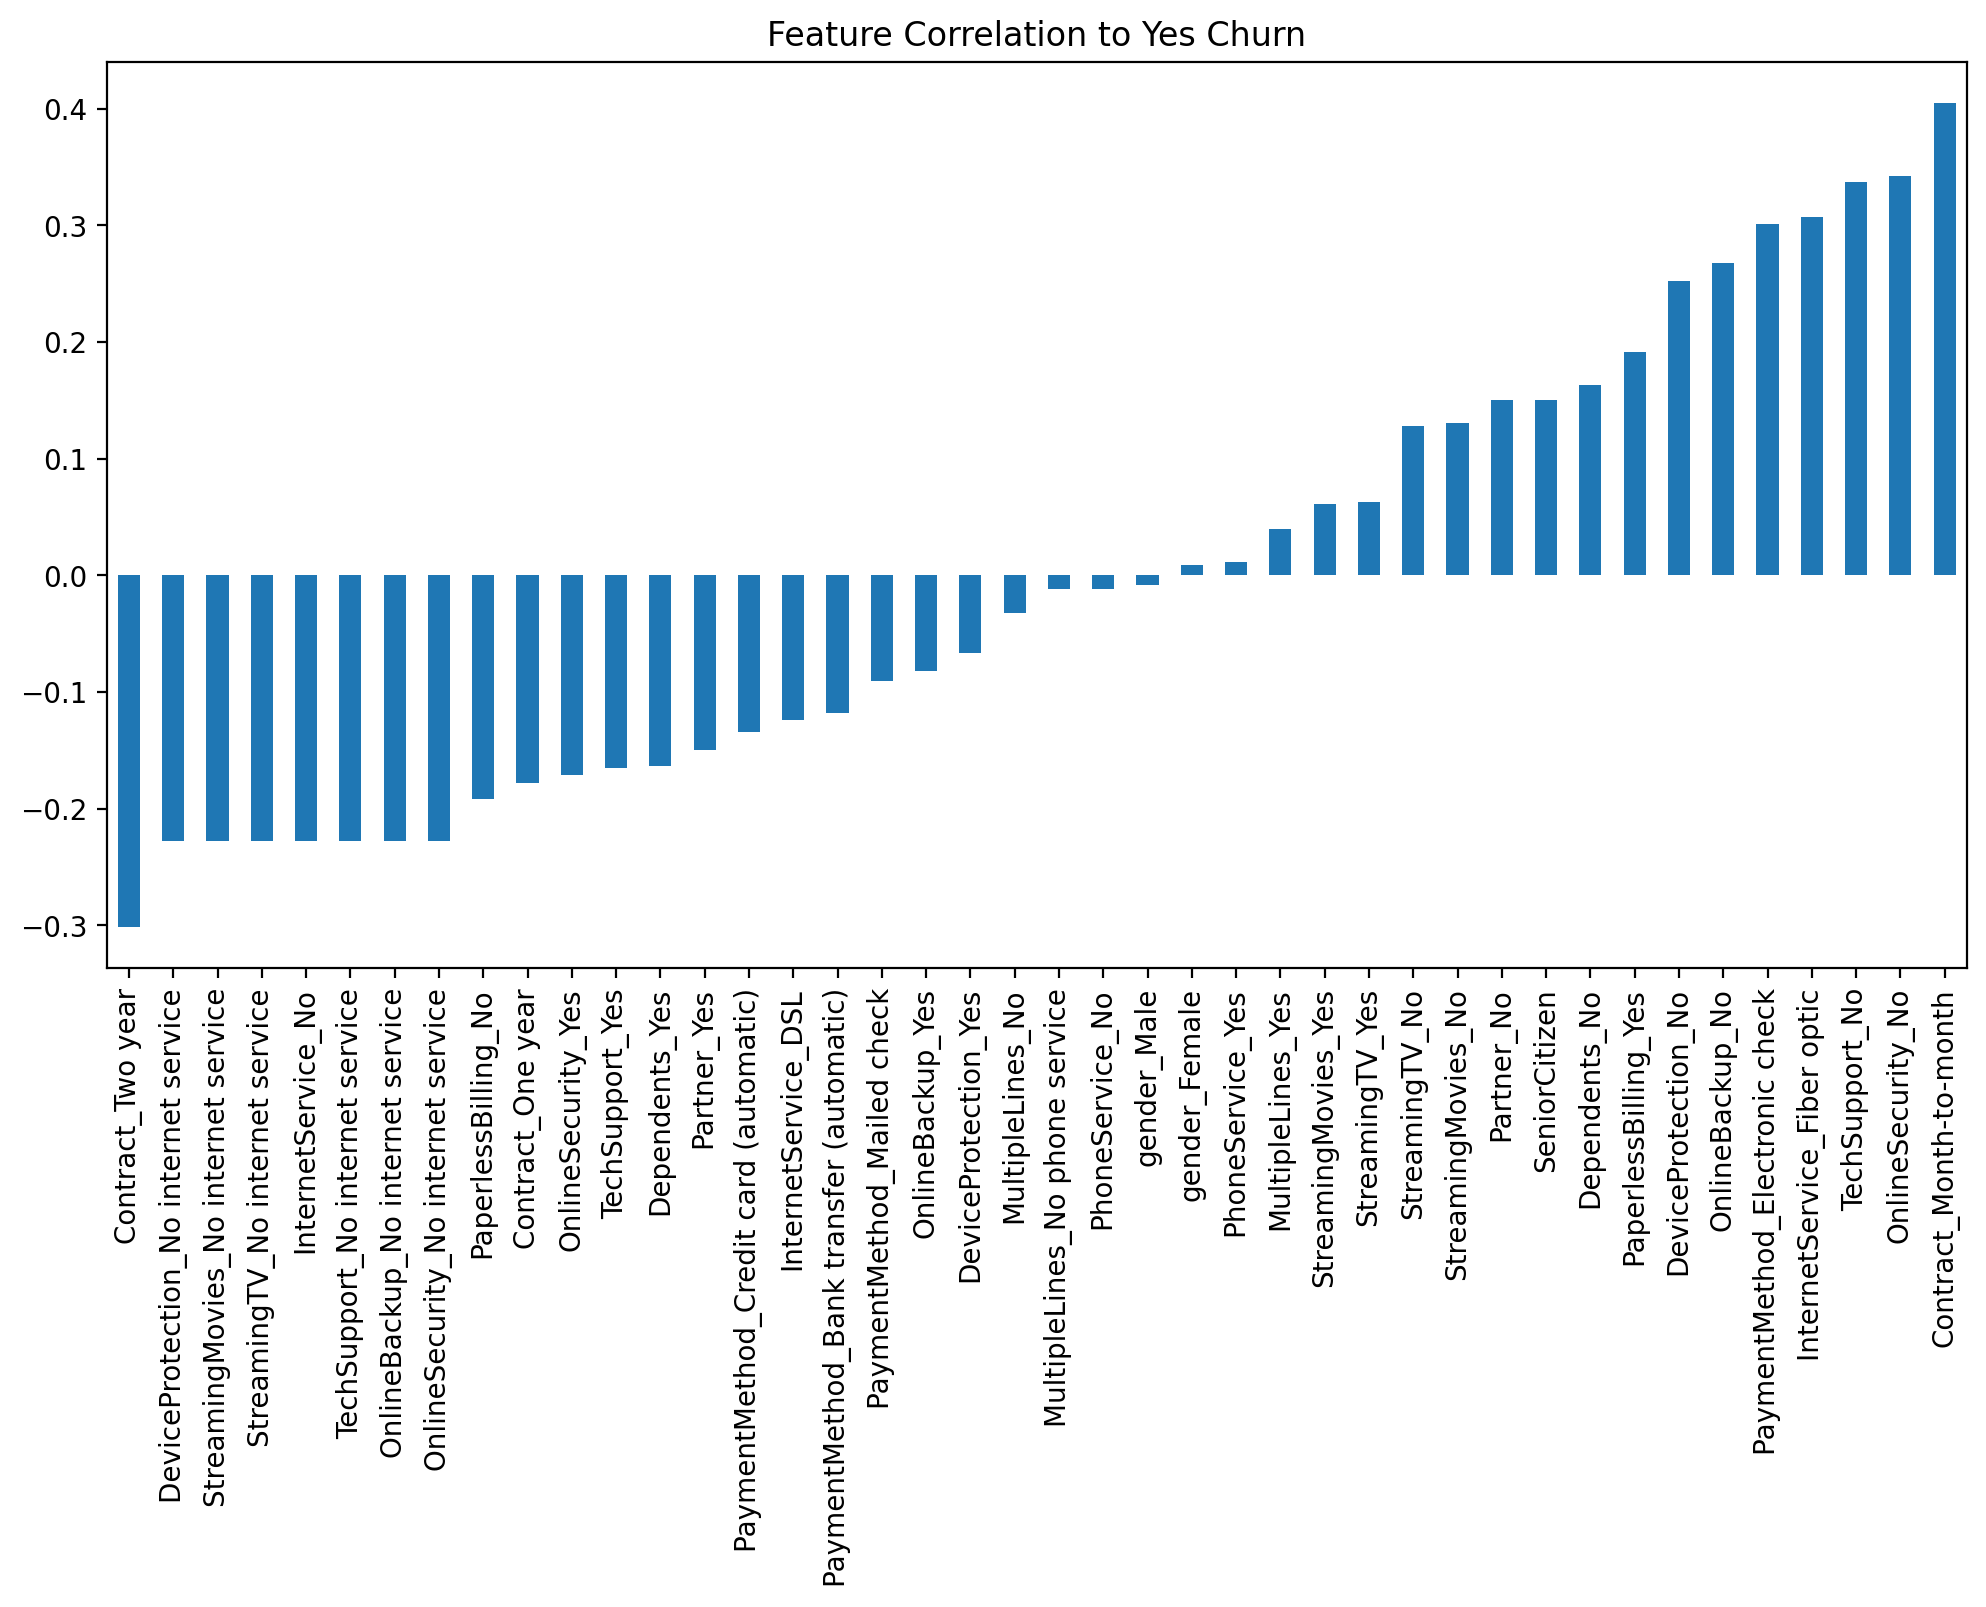

In [261]:
#Creating BarPlot for correlation

plt.figure(figsize=(12,6), dpi=200)
corr_df.corr()['Churn_Yes'].sort_values()[1:-1].plot(kind='bar')
plt.title('Feature Correlation to Yes Churn')

---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

In [262]:
# Analyzing unique Contract Types available

df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

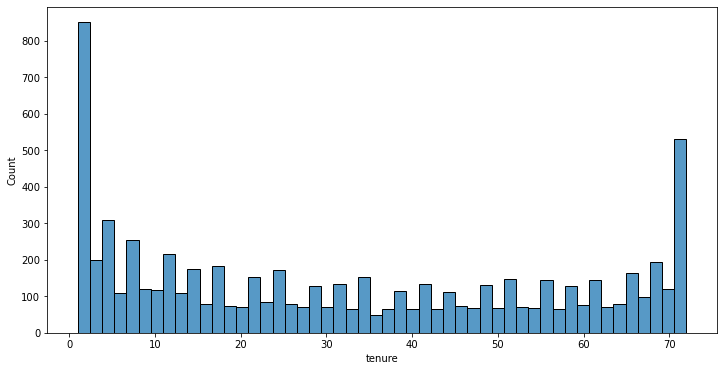

In [263]:
#Creating a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='tenure', bins=50)

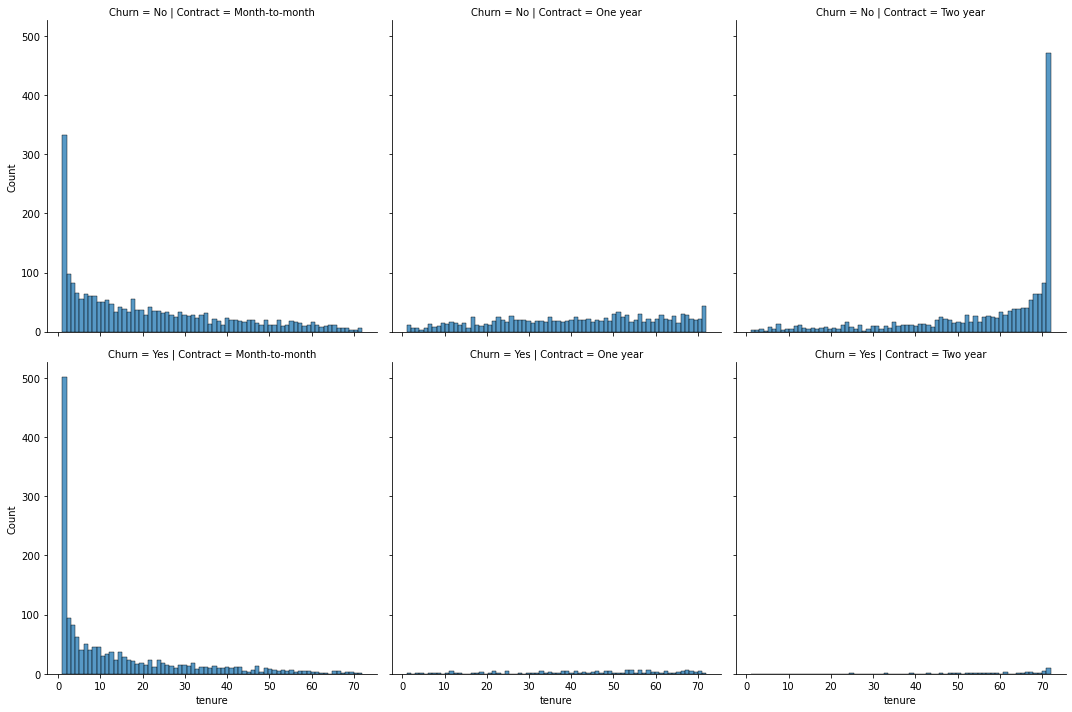

In [264]:
#Creating histograms separated by two additional features, Churn and Contract

sns.displot(data=df, x='tenure',bins=70,row='Churn',col='Contract')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

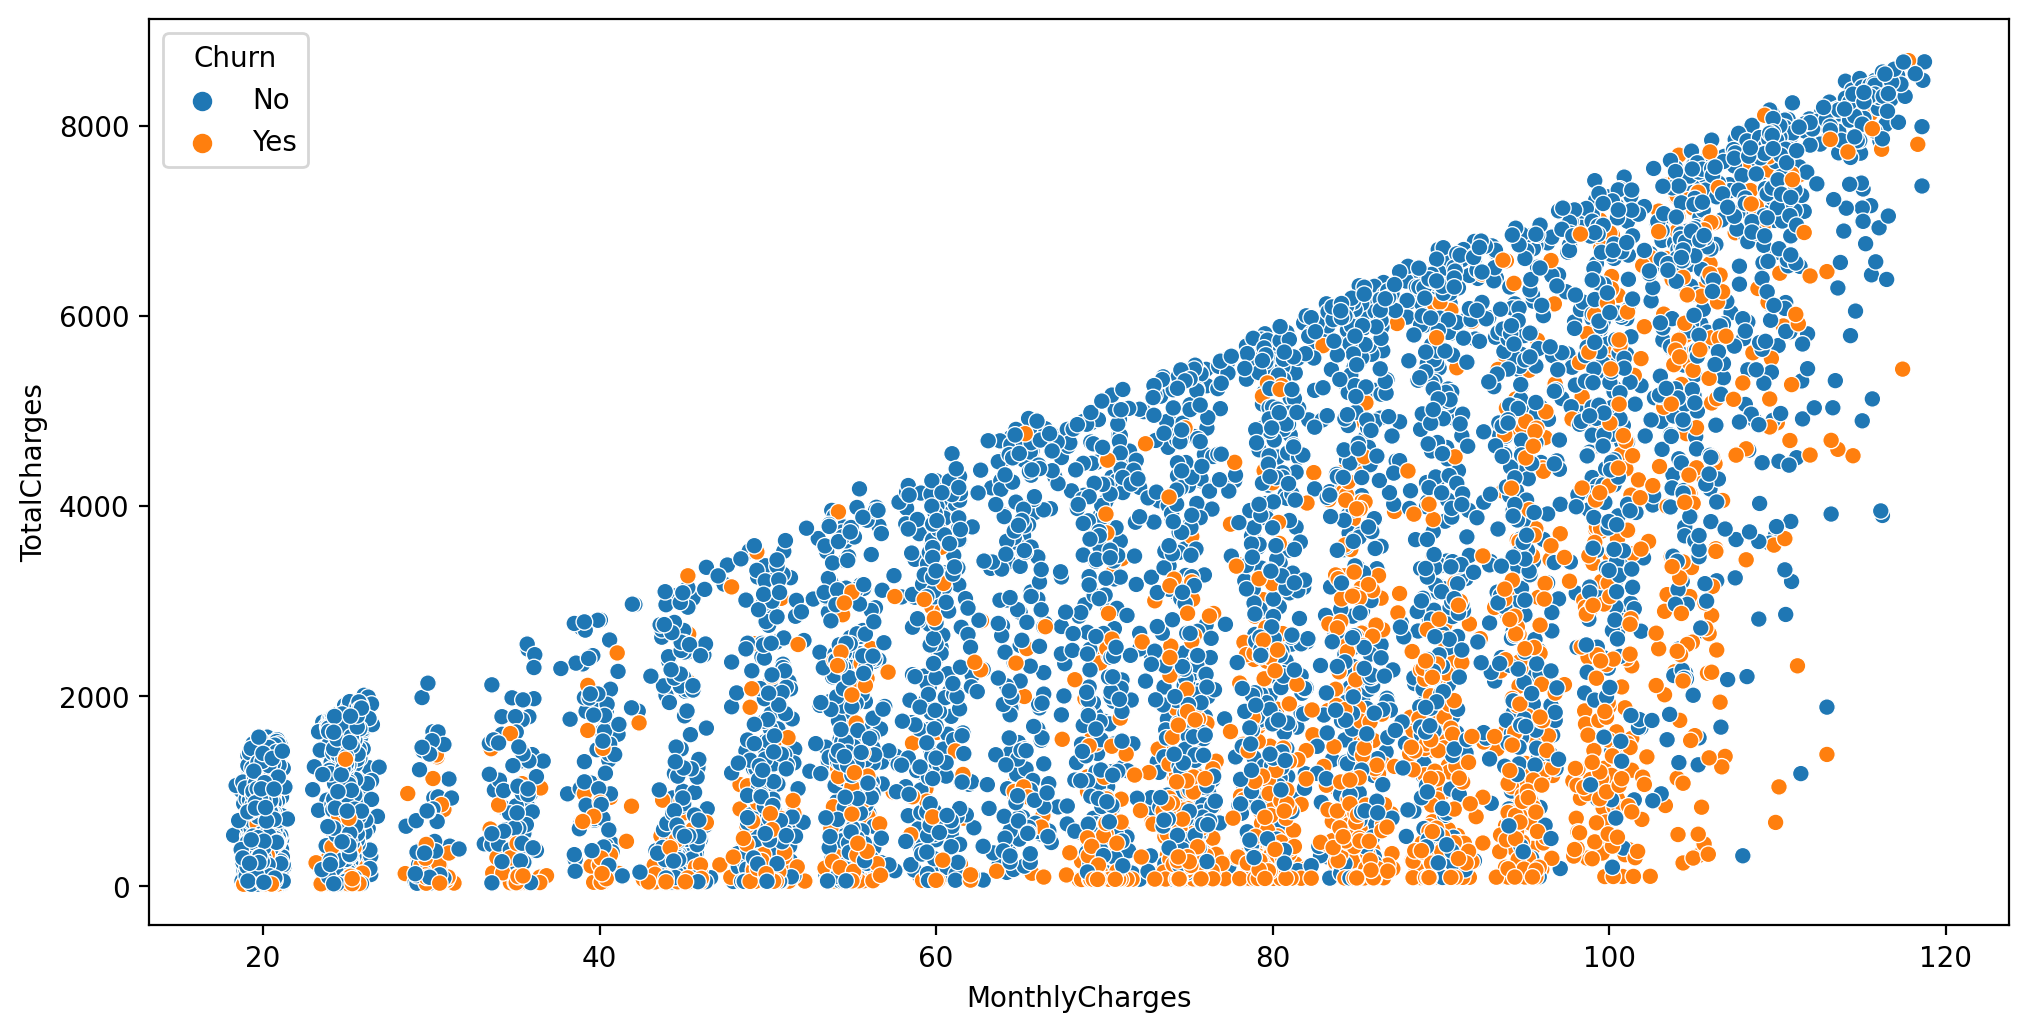

In [265]:
#Creating a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

### Creating Cohorts based on Tenure and calculating the Churn rate (percentage that had Yes Churn) per cohort.

In [266]:
#CODE HERE
churn_yes = 100 * len(df[df['Churn']=='Yes'])/len(df)
churn_yes


26.57849829351536

In [267]:
churn_no = 100 * len(df[df['Churn']=='No'])/len(df)
churn_no

73.42150170648465

In [268]:
df.groupby('tenure').apply(lambda df: 100 * len(df[df['Churn']=='Yes'])/len(df))

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Length: 72, dtype: float64

### From the above analysis, we find that the general trend is longer the tenure of the cohort, less is the churn rate

<AxesSubplot:xlabel='tenure'>

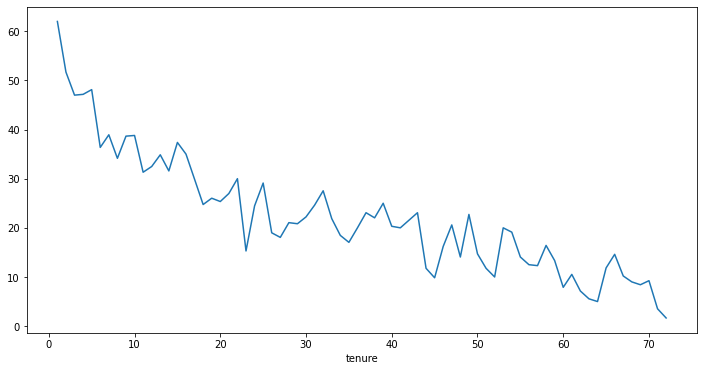

In [269]:
#Displaying plot for Churn Rate per months of tenure
plt.figure(figsize=(12,6))
df.groupby('tenure').apply(lambda df: 100 * len(df[df['Churn']=='Yes'])/len(df)).plot()

### Broader Cohort Groups
#### Based on the tenure column values, creating a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [270]:
# CODE HERE
def cohort(x):
    if x<13:
        return '0-12 months'
    elif x>12 and x<25:
        return '12-24 months'
    elif x>24 and x<49:
        return '24-48 months'
    elif x>48:
        return 'Over 48 months'

df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [271]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-24 months
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Over 48 months
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12 months
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12 months


In [272]:
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 months
1,34,24-48 months
2,2,0-12 months
3,45,24-48 months
4,2,0-12 months
...,...,...
7027,24,12-24 months
7028,72,Over 48 months
7029,11,0-12 months
7030,4,0-12 months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

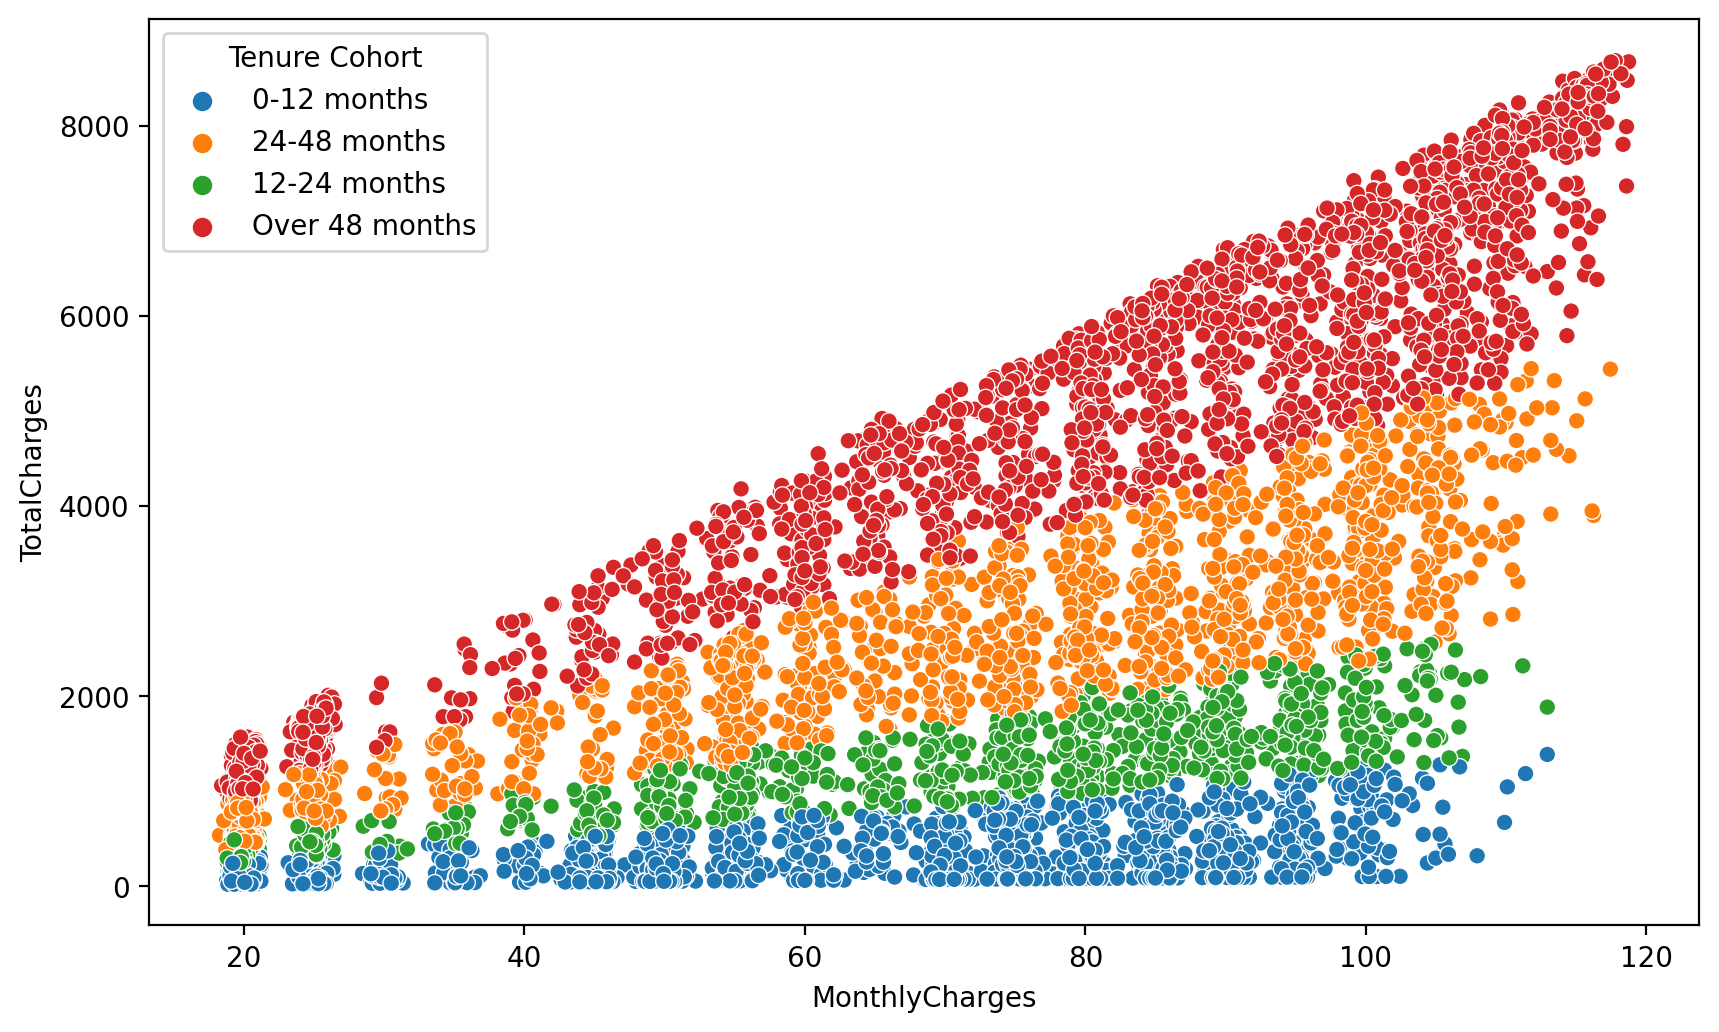

In [273]:
#Creating a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort')

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

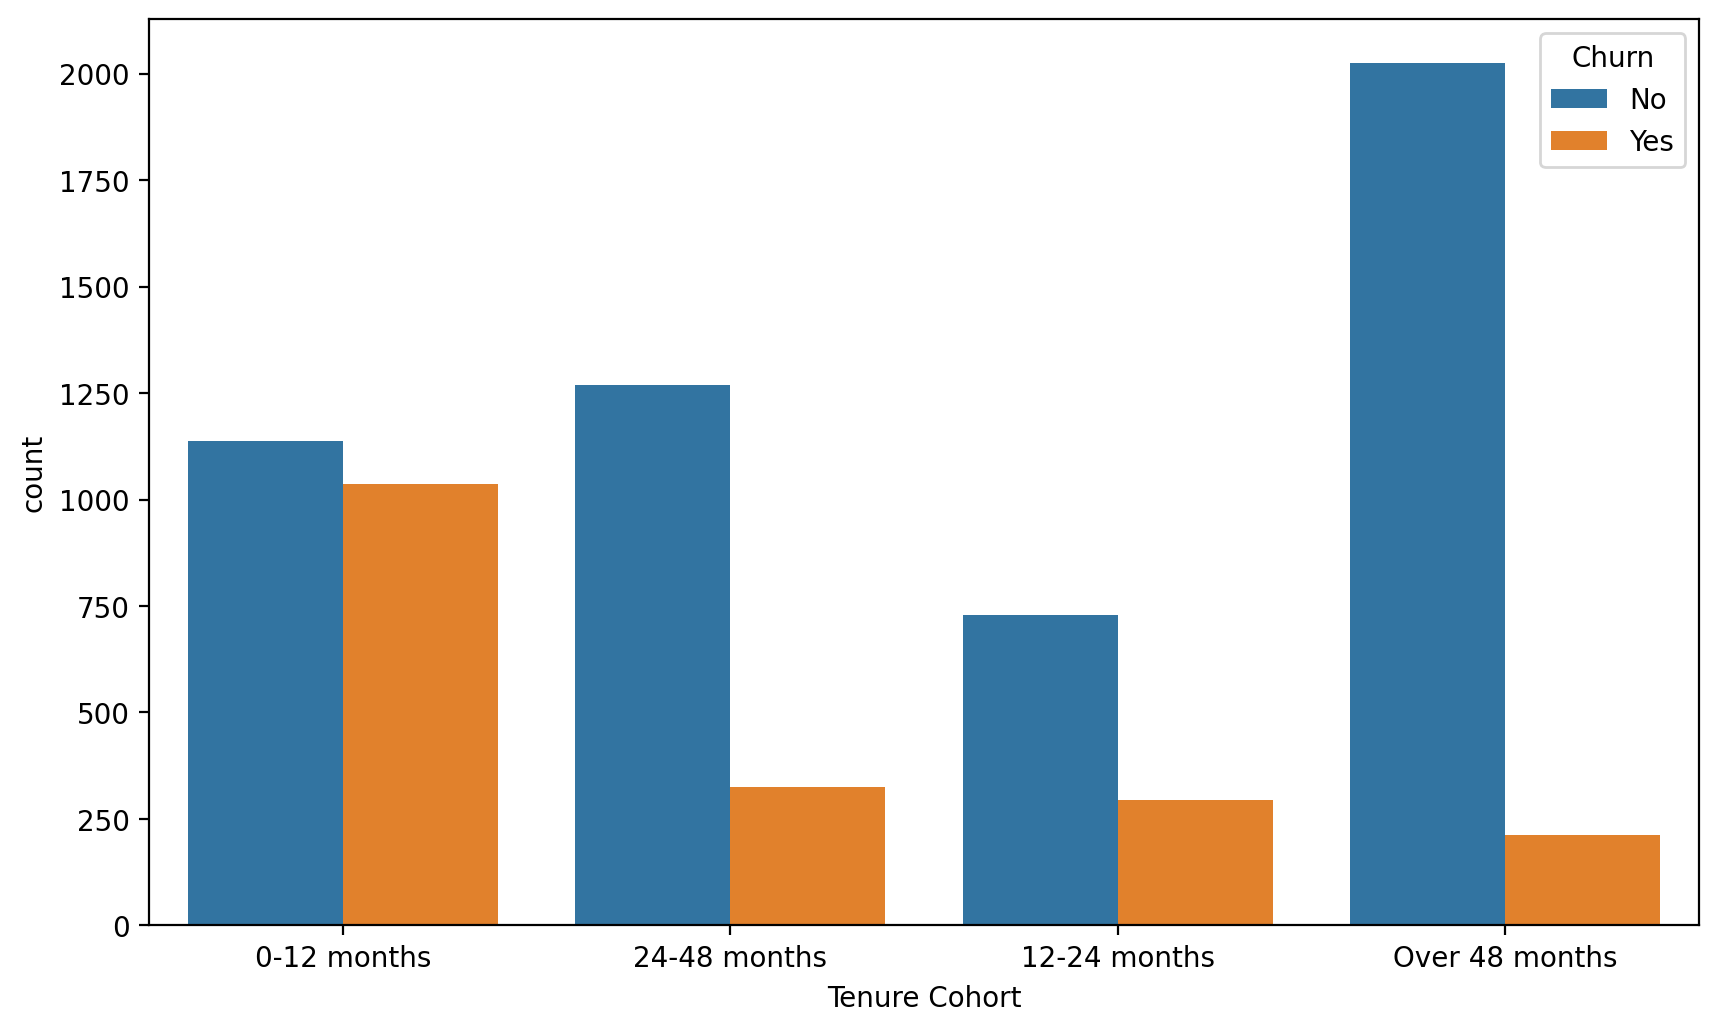

In [274]:
#Creating a count plot showing the churn count per cohort
plt.figure(figsize=(10,6), dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

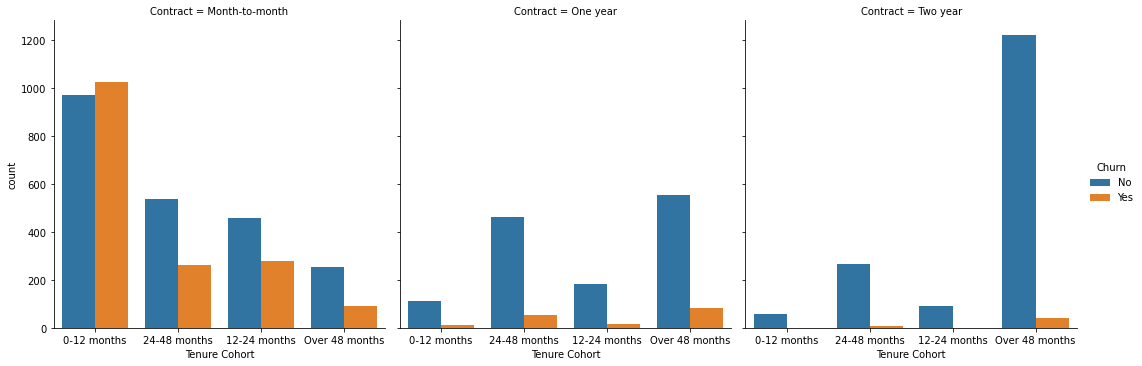

In [275]:
#Creating a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue

sns.catplot(data=df, x='Tenure Cohort', col='Contract', hue='Churn', kind='count')

-----

# Part 4: Predictive Modeling

**Exploring various supervised learning models to make comparisons : 
1)Logistic Regression
2)K Nearest Neighbors
3)A Single Decision Tree
4)Random Forest
5)AdaBoost
6)Gradient Boosting**

**Separating out the data into X features and Y label. Creating dummy variables where necessary**

In [276]:
X = pd.get_dummies(df.drop(['Churn','customerID'], axis=1), drop_first=True)

In [277]:
y = df['Churn']

**Performing a train test split, holding out 10% of the data for testing**

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [280]:
#Performing Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## 1)Logistic Regression

In [281]:
from sklearn.linear_model import LogisticRegressionCV 

In [282]:
log_model = LogisticRegressionCV()

In [283]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

**Reporting back your search's optimal parameters, specifically the C value**

In [284]:
log_model.C_

array([0.04641589])

In [285]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

**Calculating Performance Metrics for Logistic Regression**

In [286]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [287]:
y_pred = log_model.predict(scaled_X_test)

In [288]:
confusion_matrix(y_test,y_pred)

array([[509,  48],
       [ 73,  74]], dtype=int64)

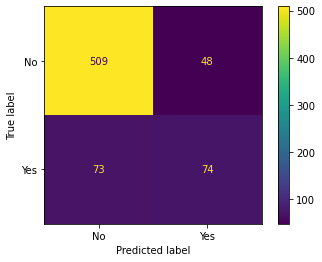

In [289]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [290]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.61      0.50      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



## 2)K Nearest Neighbor (KNN)

**Creating a PipeLine that contains both a StandardScaler and a KNN model**

In [291]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [292]:
scaler = StandardScaler()

In [293]:
knn = KNeighborsClassifier()

In [294]:
operations = [('scaler',scaler),('knn',knn)]

In [295]:
from sklearn.pipeline import Pipeline

In [296]:
pipe = Pipeline(operations)

**Performing a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [297]:
from sklearn.model_selection import GridSearchCV

In [298]:
k_values = list(range(1,30))

In [299]:
param_grid = {'knn__n_neighbors': k_values}

In [300]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [301]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

**Getting the best parameters**

In [302]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=28))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=28),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 28,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Text(0, 0.5, 'Accuracy')

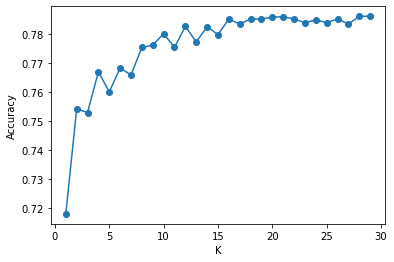

In [303]:
#Plotting K values against Accuracy
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

**Performance Metrics for K Nearest Neighbors**

In [304]:
pred = full_cv_classifier.predict(X_test)

In [305]:
confusion_matrix(y_test,pred)

array([[498,  59],
       [ 74,  73]], dtype=int64)

In [306]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.50      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.70      0.70       704
weighted avg       0.80      0.81      0.81       704



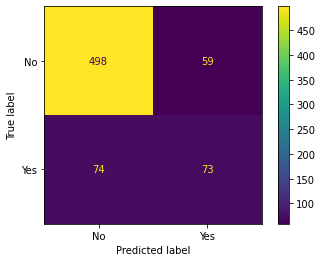

In [307]:
plot_confusion_matrix(full_cv_classifier, X_test, y_test)

## 3)Single Decision Tree

In [308]:
from sklearn.tree import DecisionTreeClassifier

In [309]:
model = DecisionTreeClassifier()

In [310]:
from sklearn.model_selection import GridSearchCV

In [311]:
grid_params = {'max_depth' : range(1,10)}

In [312]:
grid_model = GridSearchCV(model, grid_params)

In [313]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)})

**Finding the number of trees for which the model performed best**

In [314]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=5)

**Using the value to create a new decision tree**

In [315]:
latest_model = DecisionTreeClassifier(max_depth=5)

In [316]:
latest_model.fit(scaled_X_train, y_train)

DecisionTreeClassifier(max_depth=5)

**Calculating Performance Metrics for Single Decision Tree**

In [317]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix

In [318]:
y_pred = latest_model.predict(scaled_X_test)

In [319]:
confusion_matrix(y_test, y_pred)

array([[498,  59],
       [ 83,  64]], dtype=int64)

In [320]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



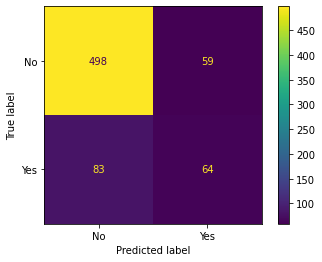

In [321]:
plot_confusion_matrix(latest_model, scaled_X_test, y_test)

In [322]:
#Calculating Feature Importance
latest_model.feature_importances_

array([0.01018467, 0.45223938, 0.02467061, 0.04460289, 0.        ,
       0.        , 0.        , 0.        , 0.00754192, 0.00799877,
       0.34022334, 0.        , 0.        , 0.00567638, 0.        ,
       0.00578629, 0.        , 0.        , 0.0284796 , 0.00852294,
       0.        , 0.        , 0.        , 0.        , 0.00962181,
       0.02332128, 0.        , 0.        , 0.03113012, 0.        ,
       0.        , 0.        , 0.        ])

**Plotting the feature Importance**

<AxesSubplot:>

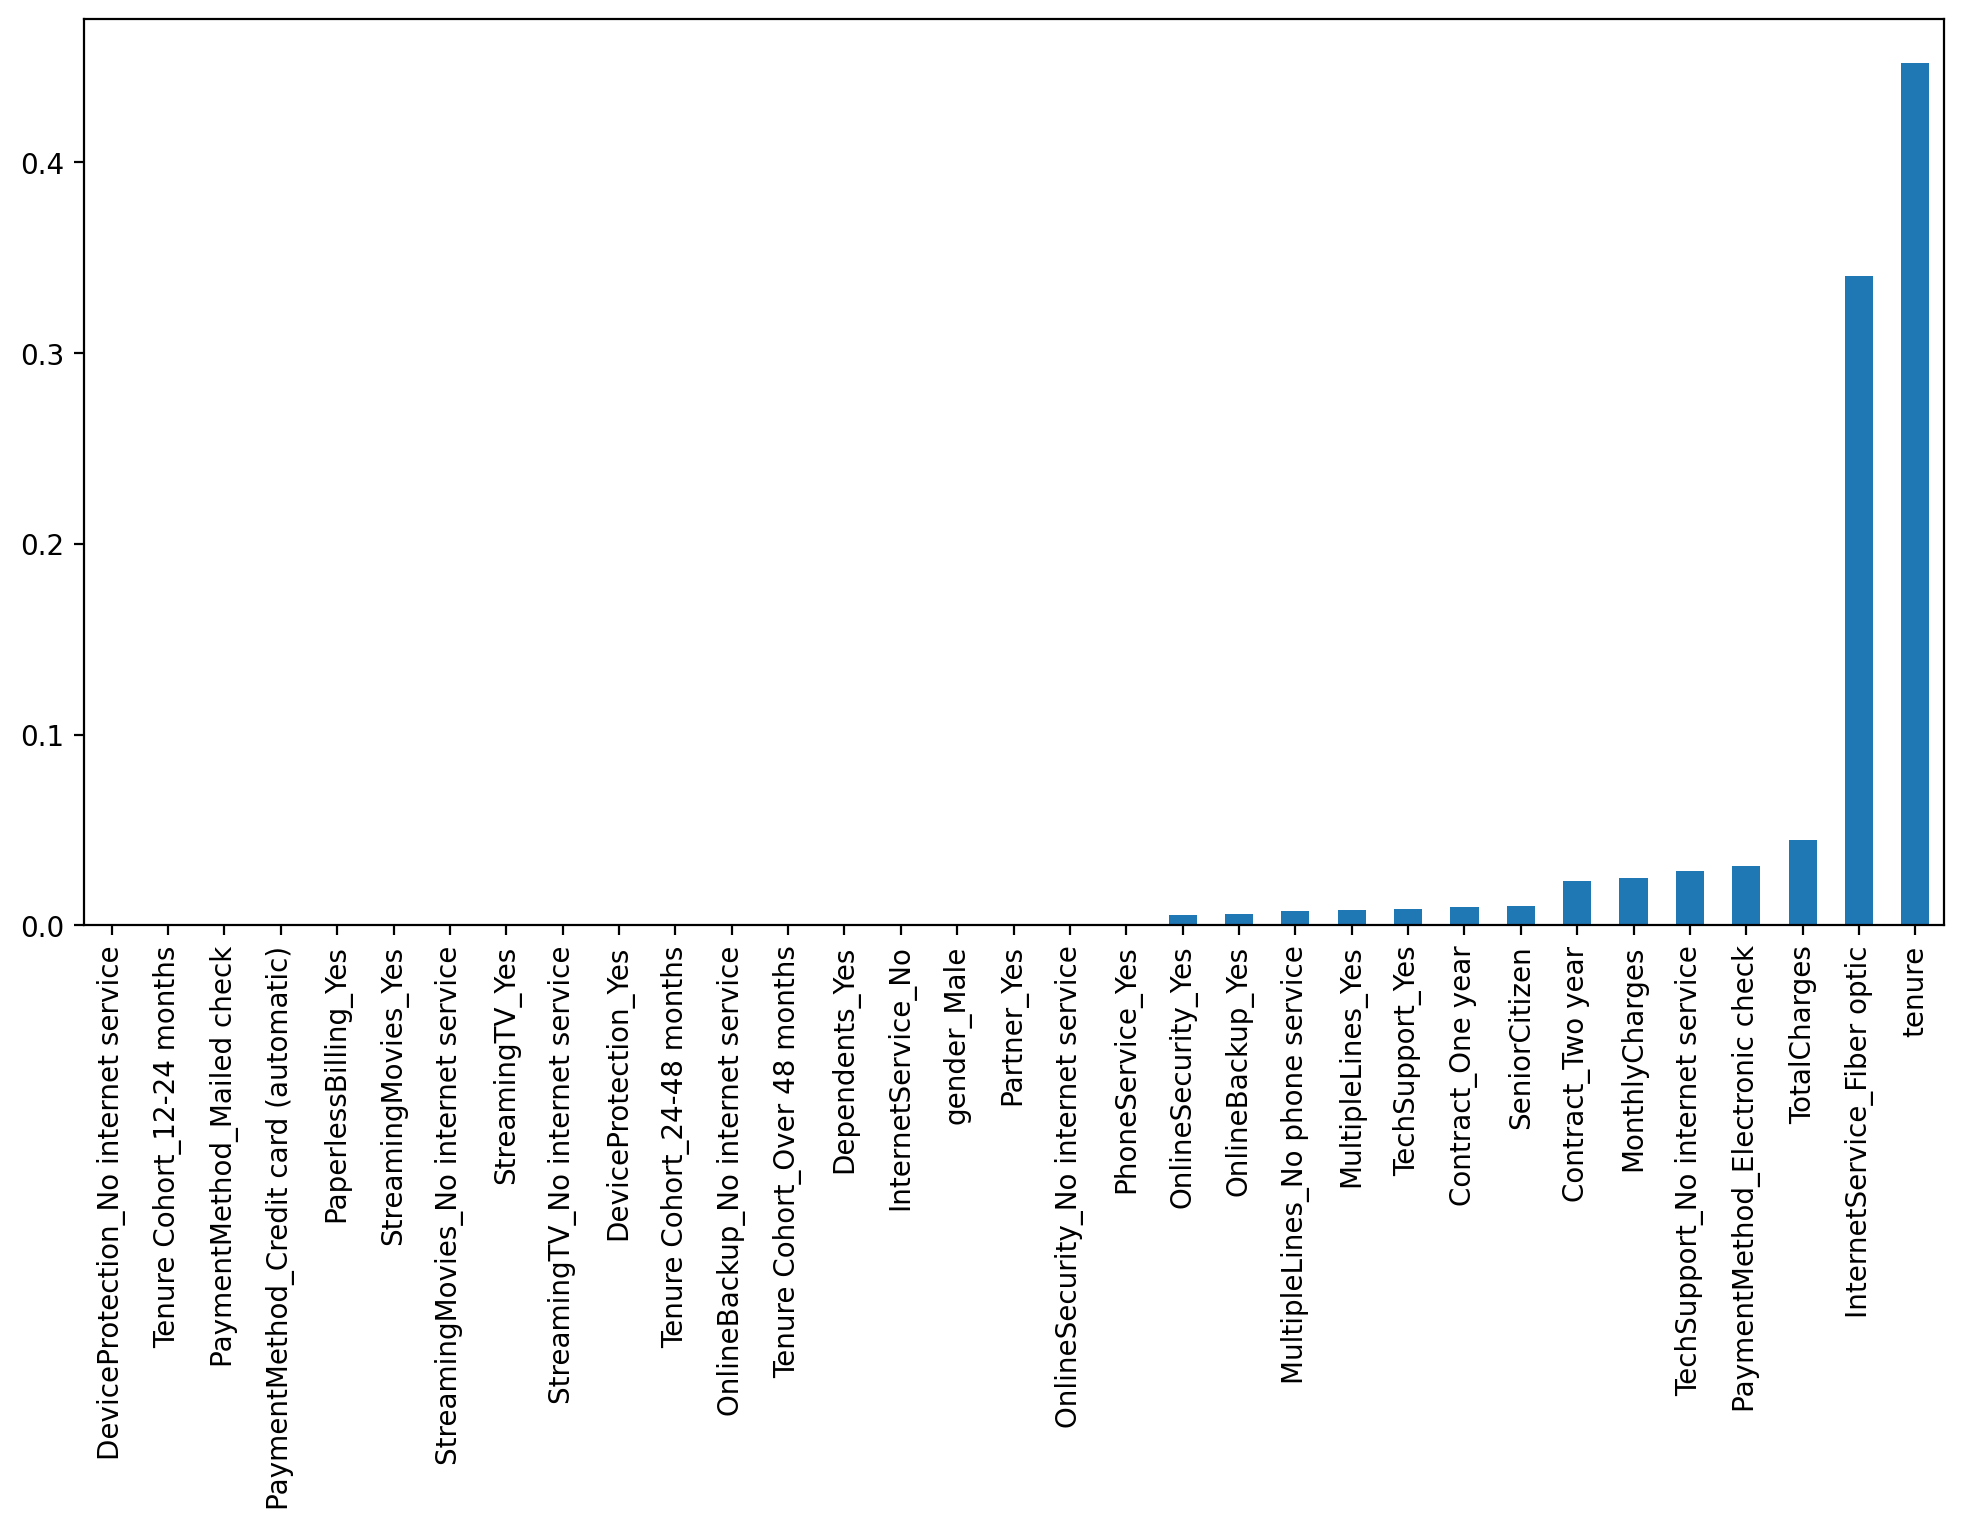

In [323]:
plt.figure(figsize=(12,6), dpi=200)
pd.Series(index=X.columns, data = latest_model.feature_importances_).sort_values().plot(kind='bar')

**Plotting the Decision Tree**

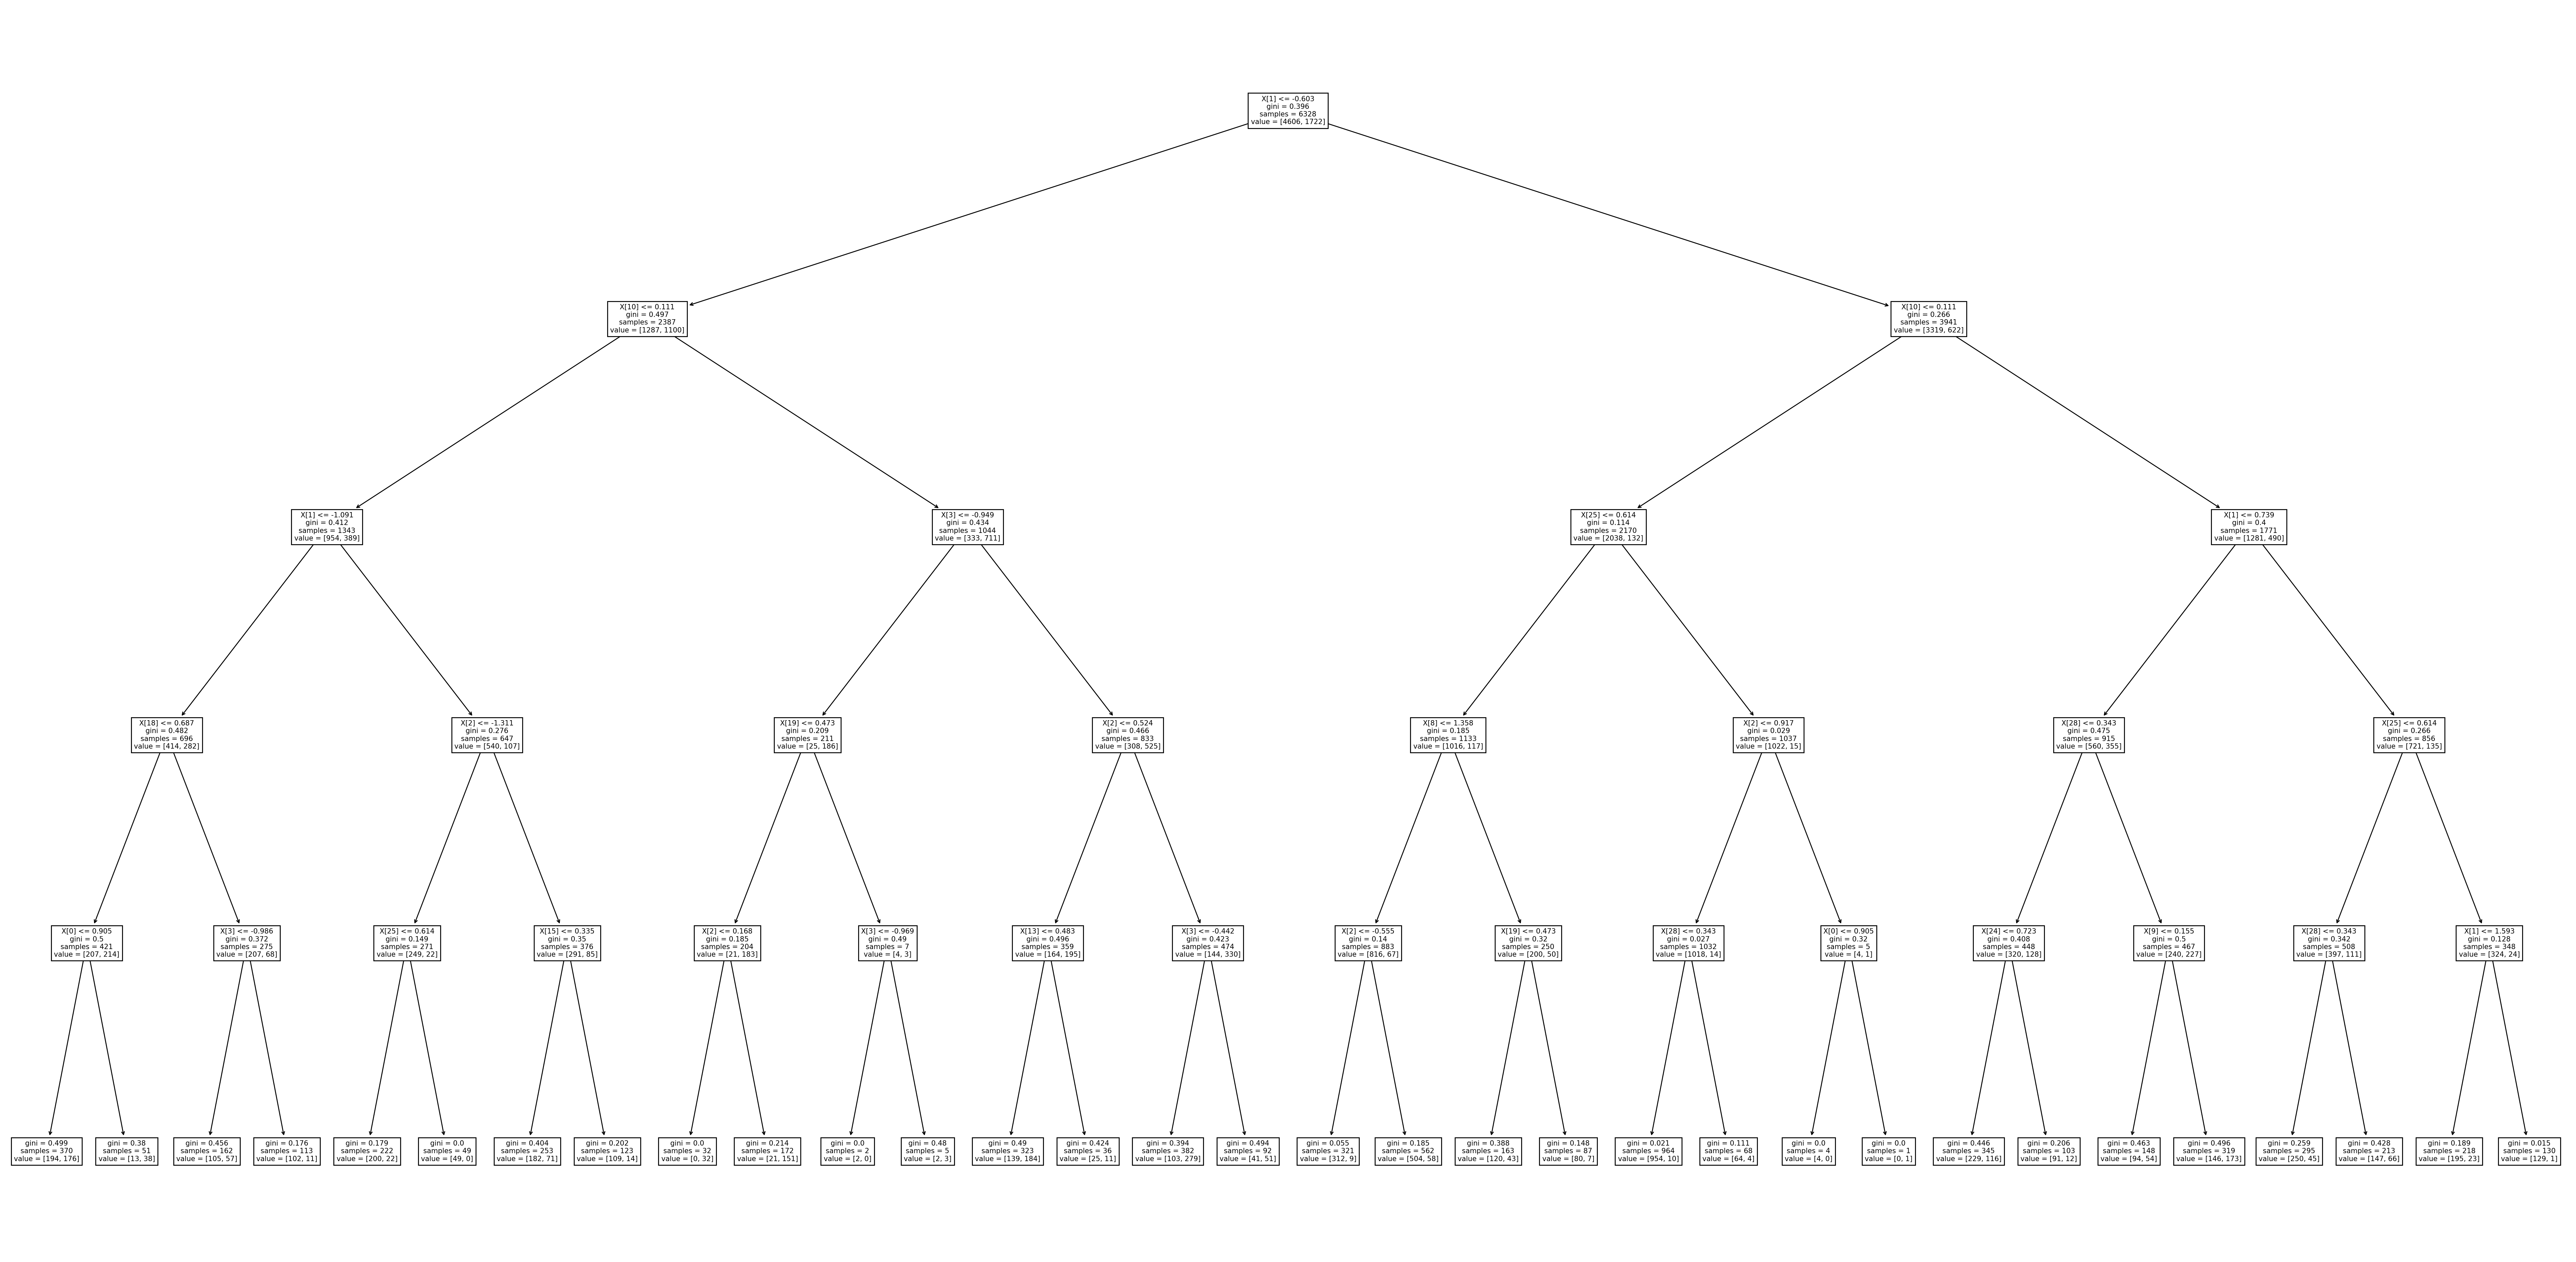

In [324]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,25), dpi=200)
plot_tree(latest_model);

## 4)Random Forest

**Creating a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [325]:
#CODE HERE
from sklearn.ensemble import RandomForestClassifier

In [326]:
RFmodel = RandomForestClassifier()

In [327]:
RFmodel.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [328]:
y_pred_rf = RFmodel.predict(scaled_X_test)

In [329]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.46      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.68       704
weighted avg       0.79      0.79      0.79       704



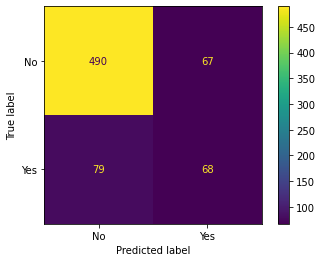

In [330]:
plot_confusion_matrix(RFmodel, scaled_X_test, y_test)

## 5)Boosted Trees

**Using AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [331]:
#CODE HERE
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [332]:
ada = AdaBoostClassifier()

In [333]:
gb = GradientBoostingClassifier()

In [334]:
ada.fit(scaled_X_train, y_train)

AdaBoostClassifier()

In [335]:
gb.fit(scaled_X_train, y_train)

GradientBoostingClassifier()

In [336]:
ada_y_pred = ada.predict(scaled_X_test)

In [337]:
gb_y_pred = gb.predict(scaled_X_test)

**Creating Classification Report for Ada Boosting**

In [338]:
print(classification_report(ada_y_pred, y_test))

              precision    recall  f1-score   support

          No       0.90      0.88      0.89       571
         Yes       0.54      0.60      0.57       133

    accuracy                           0.83       704
   macro avg       0.72      0.74      0.73       704
weighted avg       0.84      0.83      0.83       704



**Creating Classification Report for Gradient Boosting**

In [339]:
print(classification_report(gb_y_pred, y_test))

              precision    recall  f1-score   support

          No       0.90      0.87      0.89       577
         Yes       0.50      0.57      0.53       127

    accuracy                           0.82       704
   macro avg       0.70      0.72      0.71       704
weighted avg       0.83      0.82      0.82       704



**Creating Confusion Matrix for Ada Boosting**

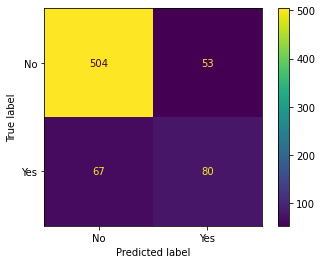

In [340]:
plot_confusion_matrix(ada, scaled_X_test, y_test)

**Creating Confusion Matrix for Gradient Boosting**

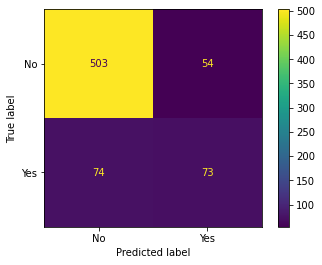

In [341]:
plot_confusion_matrix(gb, scaled_X_test, y_test)

# With base models, we got best performance from Logistic Regression Model and an AdaBoostClassifier